Name : Prasanna Gnanavel

Student Number : 190906922

Module : ECS766A - DATA MINING




**Assignment 2- Part1**

**Question 1**

1. In Section 1, what kind of relationship can be inferred from summary statistics regarding ``ACT composite score`` and ``SAT total score``? Which visualisations make this relationship apparent?

**Solution**

Postive correlation is inferred between ACT and SAT score. The correlation value is 0.885884. 

The below scatter plot make this relationship apparent.

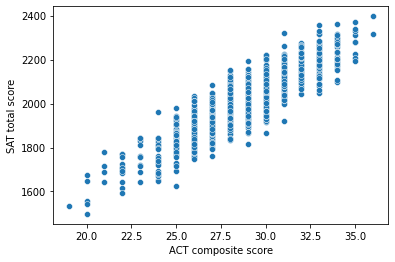

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('graduation_rate.csv')
sns.scatterplot(x='ACT composite score', y='SAT total score', data=df)
plt.show()

**Question 2**

**2. Based on the box plots presented in Section 1, what is the relationship between parental level of education and parental income? Using table visualisation, find and show the entire rows that correspond to the outliers regarding parental income whose parents have a master's degree.**

**Solution**

The parental income increases as the parental level of education increases. The outlierss have a master's degree given below:

master's degree	36	2397	120391	4.0	4.0	
master's degree	23	1813	59724	3.3	3.1	

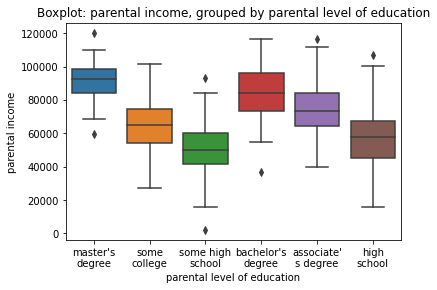

In [ ]:
ax = sns.boxplot(x='parental level of education', y='parental income', data=df)
plt.title('Boxplot: parental income, grouped by parental level of education')

# Wrap xticks 
import textwrap
ax.set_xticklabels([textwrap.fill(t.get_text(), 10)  for t in ax.get_xticklabels()])

plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv('graduation_rate.csv')
print('Grouping by parental level of education and computing the max for other features:')
display(df.groupby('parental level of education').max())

print('Grouping by parental level of education and computing the min for other features:')
display(df.groupby('parental level of education').min())

Grouping by parental level of education and computing the max for other features:


,ACT composite score,SAT total score,parental income,high school gpa,college gpa,years to graduate
parental level of education,,,,,,
associate's degree,35,2370,116853,4.0,4.0,9
bachelor's degree,34,2358,116398,4.0,3.9,9
high school,35,2278,107194,4.0,3.9,9
master's degree,36,2397,120391,4.0,4.0,8
some college,35,2318,101337,4.0,3.9,10
some high school,34,2202,93436,4.0,3.9,10


Grouping by parental level of education and computing the min for other features:


,ACT composite score,SAT total score,parental income,high school gpa,college gpa,years to graduate
parental level of education,,,,,,
associate's degree,21,1644,40139,2.8,2.8,3
bachelor's degree,20,1646,36936,3.0,2.8,3
high school,20,1541,15896,2.7,2.8,3
master's degree,23,1813,59724,3.3,3.1,3
some college,19,1532,27421,2.7,2.7,3
some high school,20,1498,1882,2.7,2.7,3


**Question 3**

**3. Using an example, explain the importance of scaling features so that their magnitudes are comparable when computing distances**

Solution

Feature scaling is critical step prior developing a machine learning model.Machine learning algorithm works on an assumption that the higher magnitudes have superiority. 

For an example 1000 grams of apple is priced at 1£.  The unit here for weight is grams and the distance between data is not valid. The weight and price are not represented in the same scale hence weight will have superiority while developing the model. The most common techniques of feature scaling are Normalization and Standardization.



**Question 4**

**4. In Section 1, the distance matrix visualisation is not very informative. However, it is still possible to infer that the average distance between students whose parents only have some high school education and students whose parents have a master's degree is larger than the average distance between students whose parents only have some high school education. Explain how this inference is possible from the visualisation**. 

Solution: 

The data was sorted based on parents eduction level prior dropping this feature hence it is possible to infer the average distance is larger.

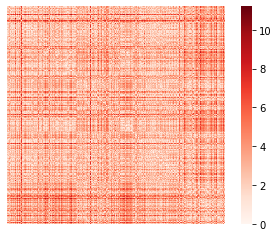

In [ ]:
from sklearn.preprocessing import StandardScaler

df_sorted = df.sort_values(by='parental level of education', ascending=True)
parental_education_sorted = df_sorted['parental level of education']

X = df_sorted.drop(columns='parental level of education').to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)
from scipy.spatial import distance

dist = distance.squareform(distance.pdist(X))
sns.heatmap(dist, square=True, xticklabels=False, yticklabels=False,
                cmap='Reds')
    
plt.show()

**Question 5**

5. **In Section 2, increase the number of evenly spaced numbers from 10 to 100 for both axes and observe the corresponding heat map created through nearest neighbour interpolation. Read about this interpolation method and explain what you observed**

Solution: 

From the below heatmap it has been observed that number of instances increased to 10,000. 


.

In [ ]:
import numpy as np
import pandas as pd
x_range = np.linspace(-1, 1, 100)
y_range = np.linspace(-1, 1, 100)

# meshgrid: X[i, j] == x_range[j] and Y[i, j] == y_range[i]
X, Y = np.meshgrid(x_range, y_range)

# Z[i, j] == f(x_range[j], y_range[i])
Z = X**2 + Y**2

df = pd.DataFrame({'x': X.reshape(-1), 'y': Y.reshape(-1), 'z = f(x,y)': Z.reshape(-1)})
display(df)

,x,y,"z = f(x,y)"
0,-1.000000,-1.0,2.000000
1,-0.979798,-1.0,1.960004
2,-0.959596,-1.0,1.920824
3,-0.939394,-1.0,1.882461
4,-0.919192,-1.0,1.844914
...,...,...,...
9995,0.919192,1.0,1.844914
9996,0.939394,1.0,1.882461
9997,0.959596,1.0,1.920824
9998,0.979798,1.0,1.960004


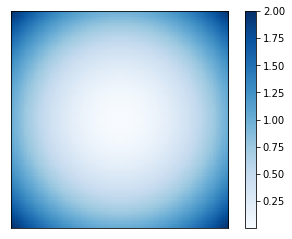

In [ ]:
import matplotlib.pyplot as plt
# Interpolation: point (x, y) is colored according to the value z of the nearest point in the dataset
plt.imshow(Z, cmap='Blues', aspect='equal', interpolation='nearest')
plt.colorbar()

# xticks and yticks would show Z matrix indices
plt.xticks([])
plt.yticks([])

plt.show()

Question 6

6. **The function load_wine from sklearn.datasets can be used to load the wine dataset into a DataFrame by using the command df = load_wine(as_frame=True)['frame'].**



In [ ]:
pip install --upgrade scikit-learn

     |████████████████████████████████| 6.8MB 5.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
df = load_wine(as_frame=True)['frame']
#df = pd.DataFrame(data.data, columns=data.feature_names)
df.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0


In [ ]:
df.dtypes


alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int64
dtype: object

In [ ]:
df.shape

(178, 14)

In [ ]:
df['target'].unique()

array([0, 1, 2])

In [ ]:
 df['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [ ]:
print("Frequency of Target")
freq_trg = df['target'].value_counts()/len(df)
display(freq_trg)

#df['target'].value_counts()

Frequency of Target


1    0.398876
0    0.331461
2    0.269663
Name: target, dtype: float64

**Question 6.1**

6.1. **Load the wine dataset.Which feature is categorical? Compute the frequency of each value of the categorical feature.**

Answer: Target feature is categorical.

The frequencey is given below : 

Frequency of Target

1 -->    0.398876

0 -->   0.331461

2-->    0.269663



**Question 6.2**

6.2. **Compute univariate and multivariate summaries for all the numerical features. Group observations by the categorical feature and compute the corresponding median for each remaining numerical feature**. 

In [ ]:
#Univariate Summary characterizes a single feature, Example mean value of a feature

df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
#Multivariate summary
display(df.corr())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [ ]:
#Multivariate Summary characterizes relationships between multiple features. Example correlation between two features is a common multivariate summary

display(df.groupby('target').median())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
target,,,,,,,,,,,,,
0,13.750,1.770,2.44,16.8,104.0,2.800,2.980,0.29,1.870,5.40,1.070,3.17,1095.0
1,12.290,1.610,2.24,20.0,88.0,2.200,2.030,0.37,1.610,2.90,1.040,2.83,495.0
2,13.165,3.265,2.38,21.0,97.0,1.635,0.685,0.47,1.105,7.55,0.665,1.66,627.5


**Question 6.3**

6.3**. Group observations by the categorical feature and create one box plot of alcohol for each group.** 

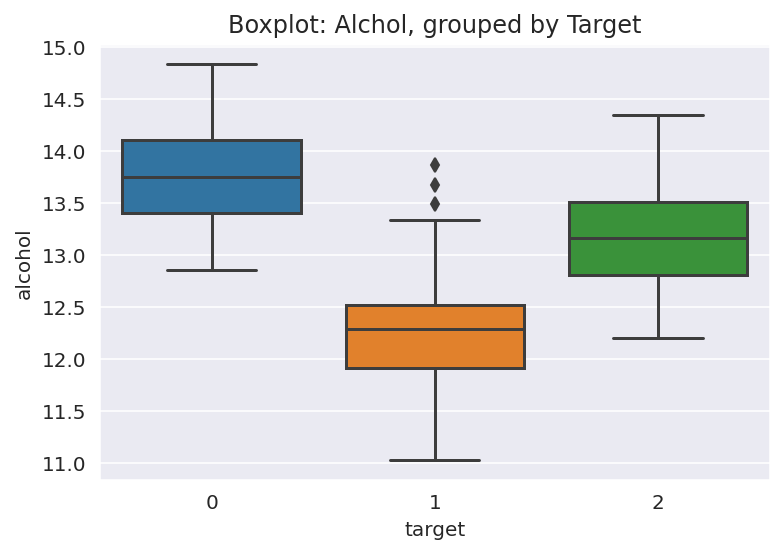

In [ ]:
%config InlineBackend.figure_formats = set(['retina'])

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
ax = sns.boxplot(x='target', y='alcohol', data=df)
plt.title('Boxplot: Alchol, grouped by Target')

# Wrap xticks 
import textwrap
ax.set_xticklabels([textwrap.fill(t.get_text(), 10)  for t in ax.get_xticklabels()])

plt.show()



**Question 6.4**

**6.4. Create a scatter plot for the pair of distinct numerical features with the highest correlation.**

In [ ]:
print("\nCorrelation coefficients:")
display(df.corr())


Correlation coefficients:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


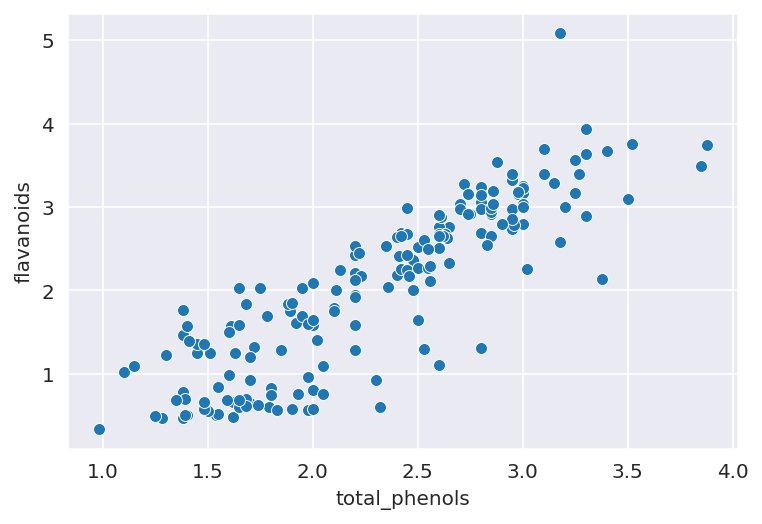

In [ ]:
sns.scatterplot(x='total_phenols', y='flavanoids', data=df)
plt.show()

**Question 6.5**

**6.5. Exclude the categorical feature, standardize the numerical features, and display a projection obtained by multidimensional scaling. Color the points by the categorical feature.**

In [ ]:
from sklearn.preprocessing import StandardScaler

df_sorted = df.sort_values(by='target', ascending=True)
df_temp = df_sorted['target']

X = df_sorted.drop(columns='target').to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(178, 13)

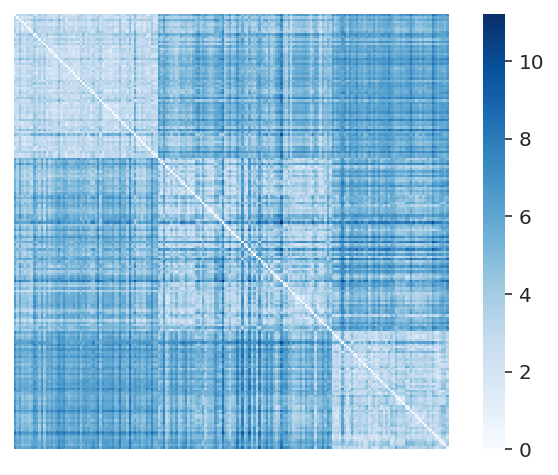

In [ ]:
from scipy.spatial import distance

dist = distance.squareform(distance.pdist(X))
sns.heatmap(dist, square=True, xticklabels=False, yticklabels=False,
                cmap='Blues')
    
plt.show()

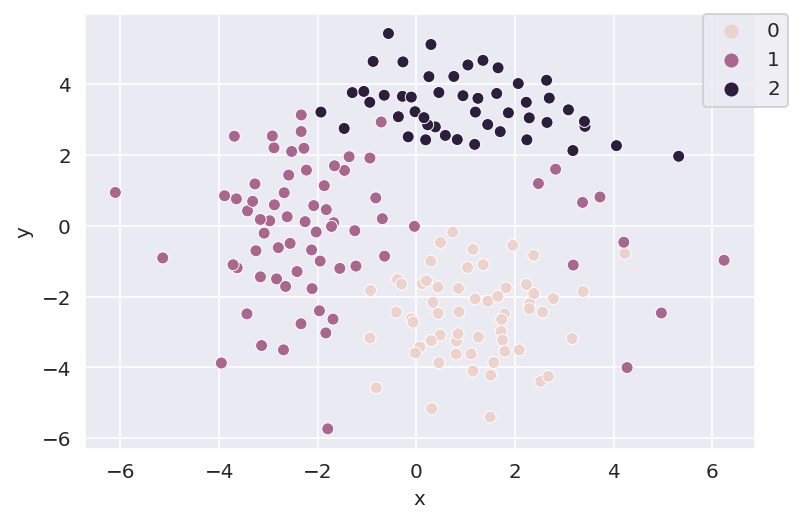

In [ ]:
from sklearn.manifold import MDS
  
emb = MDS(n_components=2)
 
Xp = emb.fit_transform(X)
df_projection = pd.DataFrame({'x': Xp[:, 0], 'y': Xp[:, 1],'target': df_temp})
sns.scatterplot(x='x', y='y', hue='target', data=df_projection)
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
plt.show()

**Assignment2- Part2**

**Question 1**


1. A data warehouse for a music streaming company consists of the dimensions song, user, time (time and date of when the user listened to a song), and the two measures count (how many times a user listened to the song) and fee (fee paid by the streaming company to the artist every time a user listens to that song).
    1. Draw a schema diagram for the above data warehouse using either a star, snowflake, or fact constellation schema

  Solution 

  Star Schema given below

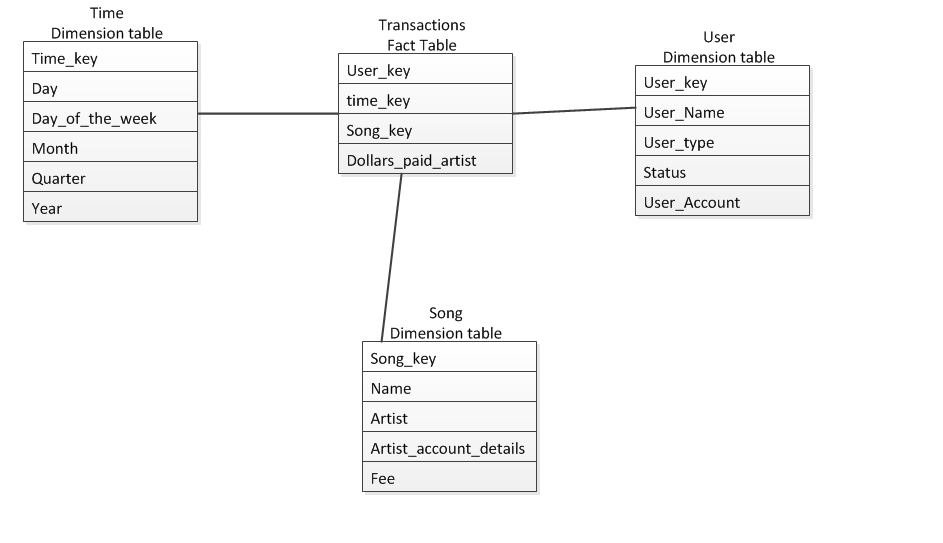


  2. **Starting with the base cuboid [time, user, song], what specific OLAP operations should be performed in order to list the total fee collected for a given song for a given month of a given year (e.g., October 2020)?**

   Solution

  Dice and Rollup OLAP operations

In [ ]:
cuts = [cubes.PointCut("Month", ["October"]),cubes.PointCut("Year", ["2020"]),cube.Pointcut("Song_Name",["roja"])]
cell = cubes.Cell(cube, cuts)
result = browser.aggregate(cell,drilldown=["item"])
result.summary

**Question 2**

**2. Suppose that we have access to a data cube that contains information on rainfall for specific regions. The data cube has dimensions region, precipitation, and time.**

 1. **Assuming that we would like to compute the total amount of rainfall for a given region and month, which data cube measure would we use? To which category of data cube measures does this particular measure fall into? **

Solution:

A data cube measure is a numeric function that can be evaluated at each point the data cube space. In the given scenario we will use sum() function.

The function sum() categorises as Distributive funciton.

2. Assuming that we would like to compute the average rainfall for a given region and month, which *data cube measure* would we use? 
    To which category of data cube measures does this particular measure fall into? **bold text**


Solution: 

We will use avg() data cube measure.  

It is categorises as Algebraic function

**Question 3**

3. **Using the same CSV file and data cube in the tutorial above, modify the "tutorial_model.json" file to include aggregate measures for the minimum and maximum amount in the data cube. Using these implemented aggregate measures, produce the values for the minimum and maximum amount in the data per year. Make sure to show your work in the report.**

Solution: 

The below line is added in the json file

{
                        "name": "amount_min",
                        "function": "min",
                        "measure": "amount"
                    },
                    {
                        "name": "record_count",
                        "function": "count"
                    }

In [ ]:
!pip install cubes

In [ ]:

from sqlalchemy import create_engine
from cubes.tutorial.sql import create_table_from_csv
engine = create_engine('sqlite:///data.sqlite')
#engine =create_engine('sqlite:///{}'.format(xxx), connect_args={'timeout': 15})
create_table_from_csv(engine,
                      "IBRD_Balance_Sheet__FY2010.csv",
                      table_name="ibrd_balance",
                      fields=[
                          ("category", "string"),
                          ("category_label", "string"),
                          ("subcategory", "string"),
                          ("subcategory_label", "string"),
                          ("line_item", "string"),
                          ("year", "integer"),
                          ("amount", "integer")],
                      create_id=True
                     )
from cubes import Workspace
workspace = Workspace()
workspace.register_default_store("sql", url="sqlite:///data.sqlite")
workspace.import_model("tutorial_model.json")
cube = workspace.cube("ibrd_balance")
browser = workspace.browser(cube)
result = browser.aggregate()
result.summary["record_count"]


62

In [ ]:
result.summary["amount_sum"]

1116860

In [ ]:
result.summary["amount_max"]

128577

In [ ]:
result.summary["amount_min"]

-3043

In [ ]:
result = browser.aggregate(drilldown=["year"])
for record in result:
    print(record)

{'year': 2009, 'amount_sum': 550840, 'amount_max': 110040, 'amount_min': -1683, 'record_count': 31}
{'year': 2010, 'amount_sum': 566020, 'amount_max': 128577, 'amount_min': -3043, 'record_count': 31}


**Question 4**

4. Using the CSV file data/country-income.csv, perform the following:

1.**Load the CSV file using Cubes, create a JSON file for the data cube model, and create a data cube for the data. Use as dimensions the region, age, and online shopper fields. Use as measure the income. Define aggregate functions in the data cube model for the total, average, minimum, and maximum income. In your report, show the relevant scripts and files.**

In [ ]:
create_table_from_csv(engine,
                      "country-income.csv",
                      table_name="country_income",
                      fields=[
                          ("Region", "string"),
                          ("Age", "integer"),
                          ("Income", "integer"),
                          ("Online_Shopper", "string")],
                      create_id=True
                     )
from cubes import Workspace
workspace = Workspace()
workspace.register_default_store("sql", url="sqlite:///data.sqlite")
workspace.import_model("income_model_jsonfile.json")
cube = workspace.cube("country_income")
browser = workspace.browser(cube)
results = browser.aggregate()
results.summary["Total"]

768200

In [ ]:
results.summary["Avg"]

76820.0

In [ ]:
results.summary["Min"]

57600

In [ ]:
results.summary["Max"]

99600

In [ ]:
results.summary

{'Avg': 76820.0,
 'Max': 99600,
 'Min': 57600,
 'Total': 768200,
 'record_count': 10}

2.*** Using the created data cube and data cube model, produce aggregate results for the whole data cube; results per region; results per online shopping activity; and results for all people aged between 40 and 50.***

In [ ]:
results = browser.aggregate(drilldown=["Region"])
for i in results:
    print(i)


{'Region': 'Brazil', 'Total': 193200, 'Max': 73200, 'Min': 57600, 'Avg': 64400.0, 'record_count': 3}
{'Region': 'India', 'Total': 331200, 'Max': 94800, 'Min': 69600, 'Avg': 82800.0, 'record_count': 4}
{'Region': 'USA', 'Total': 243800, 'Max': 99600, 'Min': 64800, 'Avg': 81266.66666666667, 'record_count': 3}


In [ ]:
results = browser.aggregate(drilldown=["Age"])
for i in results:
    print(i)

{'Age': 32, 'Total': 57600, 'Max': 57600, 'Min': 57600, 'Avg': 57600.0, 'record_count': 1}
{'Age': 35, 'Total': 64800, 'Max': 64800, 'Min': 64800, 'Avg': 64800.0, 'record_count': 1}
{'Age': 40, 'Total': 69600, 'Max': 69600, 'Min': 69600, 'Avg': 69600.0, 'record_count': 1}
{'Age': 42, 'Total': 80400, 'Max': 80400, 'Min': 80400, 'Avg': 80400.0, 'record_count': 1}
{'Age': 43, 'Total': 73200, 'Max': 73200, 'Min': 73200, 'Avg': 73200.0, 'record_count': 1}
{'Age': 45, 'Total': 79400, 'Max': 79400, 'Min': 79400, 'Avg': 79400.0, 'record_count': 1}
{'Age': 46, 'Total': 62400, 'Max': 62400, 'Min': 62400, 'Avg': 62400.0, 'record_count': 1}
{'Age': 49, 'Total': 86400, 'Max': 86400, 'Min': 86400, 'Avg': 86400.0, 'record_count': 1}
{'Age': 53, 'Total': 94800, 'Max': 94800, 'Min': 94800, 'Avg': 94800.0, 'record_count': 1}
{'Age': 55, 'Total': 99600, 'Max': 99600, 'Min': 99600, 'Avg': 99600.0, 'record_count': 1}


In [ ]:
results = browser.aggregate(drilldown=["Online_Shopper"])
for i in results:
    print(i)

{'Online_Shopper': 'No', 'Total': 386400, 'Min': 62400, 'Max': 99600, 'Avg': 77280.0, 'record_count': 5}
{'Online_Shopper': 'Yes', 'Total': 381800, 'Min': 57600, 'Max': 94800, 'Avg': 76360.0, 'record_count': 5}


In [ ]:
import cubes
cuts = [cubes.RangeCut("Age",["40"],["50"])]
cell = cubes.Cell(cube, cuts)
result = browser.aggregate(cell, drilldown=["Age"])
for i in result:
      print(i)

{'Age': 40, 'Total': 69600, 'Min': 69600, 'Max': 69600, 'Avg': 69600.0, 'record_count': 1}
{'Age': 42, 'Total': 80400, 'Min': 80400, 'Max': 80400, 'Avg': 80400.0, 'record_count': 1}
{'Age': 43, 'Total': 73200, 'Min': 73200, 'Max': 73200, 'Avg': 73200.0, 'record_count': 1}
{'Age': 45, 'Total': 79400, 'Min': 79400, 'Max': 79400, 'Avg': 79400.0, 'record_count': 1}
{'Age': 46, 'Total': 62400, 'Min': 62400, 'Max': 62400, 'Avg': 62400.0, 'record_count': 1}
{'Age': 49, 'Total': 86400, 'Min': 86400, 'Max': 86400, 'Avg': 86400.0, 'record_count': 1}
